In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey (6).csv


In [ ]:
df = pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

,0
EmployeeID,0
Age,0
Gender,0
Country,0
JobRole,0
Department,0
YearsAtCompany,0
WorkHoursPerWeek,0
RemoteWork,0
BurnoutLevel,0


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

In [ ]:
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Gender
['Male' 'Non-binary' 'Prefer not to say' 'Female']

Column: Country
['UK' 'Germany' 'India' 'Australia' 'Brazil' 'USA' 'Canada']

Column: JobRole
['Sales Associate' 'Software Engineer' 'IT Admin' 'HR Specialist'
 'Customer Support' 'Project Manager' 'Marketing Manager' 'Data Scientist']

Column: Department
['HR' 'IT' 'Support' 'Engineering' 'Marketing' 'Sales']

Column: RemoteWork
['No' 'Hybrid' 'Yes']

Column: HasMentalHealthSupport
['No' 'Yes']

Column: HasTherapyAccess
['Yes' 'No']

Column: SalaryRange
['40K-60K' '80K-100K' '60K-80K' '<40K' '100K+']


In [ ]:
df = df.dropna()


In [ ]:
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['Country'].unique())
print(df['Department'].unique())
print(df['RemoteWork'].unique())
print(df['HasMentalHealthSupport'].unique())
print(df['HasTherapyAccess'].unique())
print(df['SalaryRange'].unique())


['Male' 'Non-binary' 'Prefer not to say' 'Female']
['Sales Associate' 'Software Engineer' 'IT Admin' 'HR Specialist'
 'Customer Support' 'Project Manager' 'Marketing Manager' 'Data Scientist']
['UK' 'Germany' 'India' 'Australia' 'Brazil' 'USA' 'Canada']
['HR' 'IT' 'Support' 'Engineering' 'Marketing' 'Sales']
['No' 'Hybrid' 'Yes']
['No' 'Yes']
['Yes' 'No']
['40K-60K' '80K-100K' '60K-80K' '<40K' '100K+']


In [ ]:
X = df.drop('Gender', axis=1)
y = df['Gender']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 Gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64


In [ ]:
X = df.drop('Country', axis=1)
y = df['Country']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 Country
India        464
Brazil       443
Canada       434
UK           427
Australia    418
USA          408
Germany      406
Name: count, dtype: int64


In [ ]:
X = df.drop('JobRole', axis=1)
y = df['JobRole']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 JobRole
Data Scientist       411
Software Engineer    401
Customer Support     380
Marketing Manager    372
Project Manager      362
HR Specialist        361
IT Admin             358
Sales Associate      355
Name: count, dtype: int64


In [ ]:
X = df.drop('Department', axis=1)
y = df['Department']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 Department
HR             525
Sales          522
Marketing      521
Engineering    488
IT             482
Support        462
Name: count, dtype: int64


In [ ]:
X = df.drop('HasMentalHealthSupport', axis=1)
y = df['HasMentalHealthSupport']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 HasMentalHealthSupport
No     1531
Yes    1469
Name: count, dtype: int64


In [ ]:
X = df.drop('HasTherapyAccess', axis=1)
y = df['HasTherapyAccess']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 HasTherapyAccess
No     1511
Yes    1489
Name: count, dtype: int64


In [ ]:
X = df.drop('RemoteWork', axis=1)
y = df['RemoteWork']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 RemoteWork
Hybrid    1022
No         990
Yes        988
Name: count, dtype: int64


In [ ]:
X = df.drop('SalaryRange', axis=1)
y = df['SalaryRange']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target distribution:\n", y.value_counts())

Shape of X: (3000, 24)
Shape of y: (3000,)
Target distribution:
 SalaryRange
100K+       640
80K-100K    600
<40K        594
40K-60K     593
60K-80K     573
Name: count, dtype: int64


In [ ]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(2400, 45)


In [ ]:
print(X_train.dtypes)

EmployeeID                     int64
Age                            int64
YearsAtCompany                 int64
WorkHoursPerWeek               int64
BurnoutLevel                 float64
JobSatisfaction              float64
StressLevel                  float64
ProductivityScore            float64
SleepHours                   float64
PhysicalActivityHrs          float64
CommuteTime                    int64
ManagerSupportScore          float64
HasTherapyAccess               int64
MentalHealthDaysOff            int64
WorkLifeBalanceScore         float64
TeamSize                       int64
CareerGrowthScore            float64
BurnoutRisk                    int64
Gender_Male                     bool
Gender_Non-binary               bool
Gender_Prefer not to say        bool
Country_Brazil                  bool
Country_Canada                  bool
Country_Germany                 bool
Country_India                   bool
Country_UK                      bool
Country_USA                     bool
R

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

EmployeeID                      int64
Age                             int64
YearsAtCompany                  int64
WorkHoursPerWeek                int64
BurnoutLevel                  float64
JobSatisfaction               float64
StressLevel                   float64
ProductivityScore             float64
SleepHours                    float64
PhysicalActivityHrs           float64
CommuteTime                     int64
ManagerSupportScore           float64
MentalHealthDaysOff             int64
WorkLifeBalanceScore          float64
TeamSize                        int64
CareerGrowthScore             float64
BurnoutRisk                     int64
Gender_Male                      bool
Gender_Non-binary                bool
Gender_Prefer not to say         bool
Country_Brazil                   bool
Country_Canada                   bool
Country_Germany                  bool
Country_India                    bool
Country_UK                       bool
Country_USA                      bool
JobRole_Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [ ]:
print("Logistic Regression is trained:", log_reg)
print("LDA is trained:", lda)


Logistic Regression is trained: LogisticRegression()
LDA is trained: LinearDiscriminantAnalysis()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
logreg_preds = log_reg.predict(X_test_scaled)
lda_preds = lda.predict(X_test_scaled)

In [ ]:
logreg_acc = accuracy_score(y_test, logreg_preds)
lda_acc = accuracy_score(y_test, lda_preds)
print("Logistic Regression Accuracy:", logreg_acc)
print("LDA Accuracy:", lda_acc)

Logistic Regression Accuracy: 0.18
LDA Accuracy: 0.18666666666666668


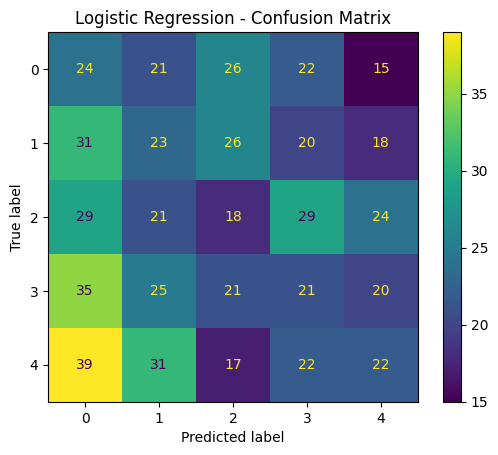

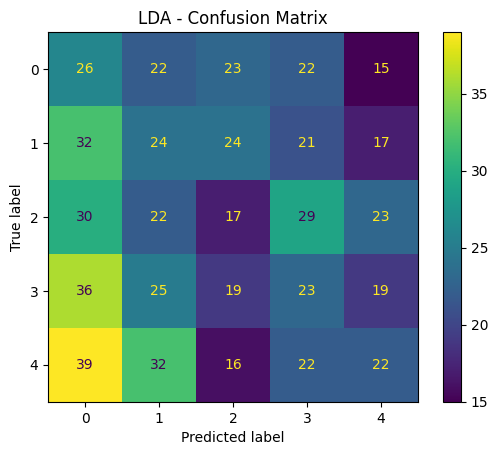

In [ ]:
cm1 = confusion_matrix(y_test, logreg_preds)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()
cm2 = confusion_matrix(y_test, lda_preds)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.title("LDA - Confusion Matrix")
plt.show()

In [ ]:
log_preds = log_reg.predict(X_test_scaled)
lda_preds = lda.predict(X_test_scaled)
# Accuracy
log_acc = accuracy_score(y_test, log_preds)
lda_acc = accuracy_score(y_test, lda_preds)
# Confusion Matrix
log_cm = confusion_matrix(y_test, log_preds)
lda_cm = confusion_matrix(y_test, lda_preds)
print("Logistic Regression Accuracy:", log_acc)
print("LDA Accuracy:", lda_acc)
print("\nLogistic Regression Confusion Matrix:\n", log_cm)
print("\nLDA Confusion Matrix:\n", lda_cm)

Logistic Regression Accuracy: 0.18
LDA Accuracy: 0.18666666666666668

Logistic Regression Confusion Matrix:
 [[24 21 26 22 15]
 [31 23 26 20 18]
 [29 21 18 29 24]
 [35 25 21 21 20]
 [39 31 17 22 22]]

LDA Confusion Matrix:
 [[26 22 23 22 15]
 [32 24 24 21 17]
 [30 22 17 29 23]
 [36 25 19 23 19]
 [39 32 16 22 22]]


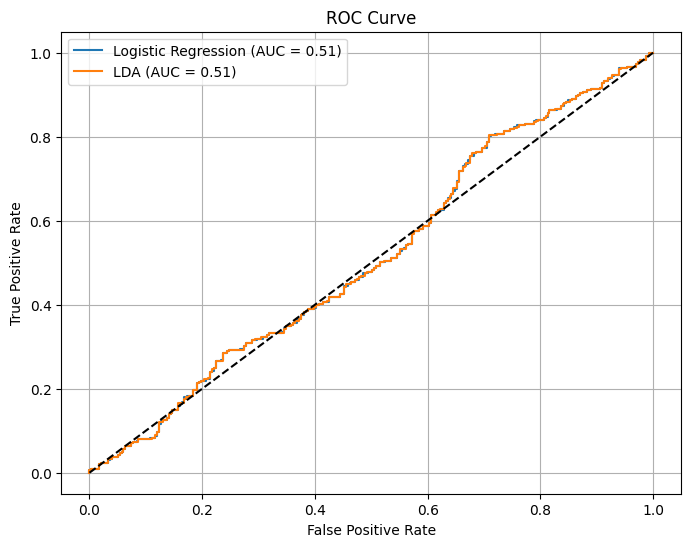

In [ ]:
log_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
lda_probs = lda.predict_proba(X_test_scaled)[:, 1]
log_auc = roc_auc_score(y_test, log_probs, multi_class='ovr')
lda_auc = roc_auc_score(y_test, lda_probs, multi_class='ovr')
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_auc:.2f})")
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {lda_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()